# Chapter 2: Understanding Time Series Data

* 싸이그래머 / 파이모션 : Moment - 파이썬을 이용한 시계열 분석 기초 [1]
* 김무성

# Contents
* Advanced processing and visualization of time series data
* Resampling time series data
    - Group wise aggregation
    - Moving statistics
* Stationary processes
    - Differencing
        - First-order differencing 
        - Second-order differencing
        - Seasonal differencing
    - Augmented Dickey-Fuller test 
* Time series decomposition
    - Moving averages
        - Moving averages and their smoothing effect 
        - Seasonal adjustment using moving average
        - Weighted moving average 
* Time series decomposition using moving averages 
* Time series decomposition using statsmodels.tsa 
* Summary

# Advanced processing and visualization of time series data

<img src="figures/cap01.png" width=600 />

# Resampling time series data
* Group wise aggregation
* Moving statistics

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
!ls

02_Understanding_Time_Series_Data.ipynb  figures


In [2]:
!ls ../

ch01  ch02  docker  Practical-Time-Series-Analysis


In [3]:
!ls ../Practical-Time-Series-Analysis/

Chapter01  Chapter03  Chapter05   LICENSE
Chapter02  Chapter04  Data Files  README.md


In [4]:
!ls ../Practical-Time-Series-Analysis/Data\ Files

Annual_Number_of_Lynx_trapped.csv
chemical-concentration-readings.csv
Data Files
DJIA_Jan2016_Dec2016.xlsx
DJIA_May2016_May2017.csv
ibm-common-stock-closing-prices.csv
inflation-consumer-prices-annual.xlsx
mean-daily-temperature-fisher-river.csv
mean-daily-temperature-fisher-river.xlsx
Monthly_CO2_Concentrations.xlsx
monthly-mean-thickness-dobson-un.csv
monthly-sunspot-number-zurich-17.csv
PRSA_data_2010.1.1-2014.12.31.csv
quarterly-beer-production-in-aus-March 1956-June 1994.csv
us-airlines-monthly-aircraft-miles-flown.csv
wisconsin-employment-time-series.csv
World Bank Mobile Phone Statistics.xlsx


In [8]:
data_path = "../Practical-Time-Series-Analysis/Data Files"
fn = 'chemical-concentration-readings.csv'

In [9]:
df = pd.read_csv(os.path.join(data_path, fn))

In [10]:
print('Shape of the dataset:', df.shape)

Shape of the dataset: (197, 2)


In [11]:
df.head(10)

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [17]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid

In [18]:
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [15]:
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

In [16]:
daily_mean

Timestamp
1975-01-01    16.866667
1975-01-02    17.258333
1975-01-03    17.458333
1975-01-04    17.416667
1975-01-05    17.033333
1975-01-06    17.150000
1975-01-07    16.833333
1975-01-08    16.516667
1975-01-09    16.783333
1975-01-10    16.750000
1975-01-11    17.133333
1975-01-12    16.750000
1975-01-13    17.050000
1975-01-14    17.125000
1975-01-15    17.266667
1975-01-16    17.408333
1975-01-17    17.540000
Freq: D, Name: Chemical conc., dtype: float64

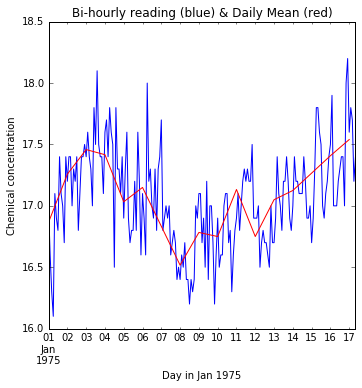

In [20]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Day in Jan 1975')
ax.set_ylabel('Chemical concentration')
plt.savefig('B07887_02_17.png', format='png', dpi=300)    

## Group wise aggregation

In [21]:
!ls

02_Understanding_Time_Series_Data.ipynb  B07887_02_17.png  figures


In [22]:
!ls ../

ch01  ch02  docker  Practical-Time-Series-Analysis


In [23]:
!ls ../Practical-Time-Series-Analysis/

Chapter01  Chapter03  Chapter05   LICENSE
Chapter02  Chapter04  Data Files  README.md


In [25]:
!ls ../Practical-Time-Series-Analysis/Data\ Files

Annual_Number_of_Lynx_trapped.csv
chemical-concentration-readings.csv
Data Files
DJIA_Jan2016_Dec2016.xlsx
DJIA_May2016_May2017.csv
ibm-common-stock-closing-prices.csv
inflation-consumer-prices-annual.xlsx
mean-daily-temperature-fisher-river.csv
mean-daily-temperature-fisher-river.xlsx
Monthly_CO2_Concentrations.xlsx
monthly-mean-thickness-dobson-un.csv
monthly-sunspot-number-zurich-17.csv
PRSA_data_2010.1.1-2014.12.31.csv
quarterly-beer-production-in-aus-March 1956-June 1994.csv
us-airlines-monthly-aircraft-miles-flown.csv
wisconsin-employment-time-series.csv
World Bank Mobile Phone Statistics.xlsx


In [26]:
data_path = "../Practical-Time-Series-Analysis/Data Files"
fn = 'mean-daily-temperature-fisher-river.csv'

In [27]:
df = pd.read_csv(os.path.join(data_path, fn))

In [28]:
df.head(10)

,Date,Mean temparature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


In [30]:
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [31]:
df.head(10)

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.00
1988-01-02,1988-01-02,-20.50
1988-01-03,1988-01-03,-22.00
1988-01-04,1988-01-04,-30.50
1988-01-05,1988-01-05,-31.00
1988-01-06,1988-01-06,-27.50
1988-01-07,1988-01-07,-26.25
1988-01-08,1988-01-08,-26.50
1988-01-09,1988-01-09,-23.00


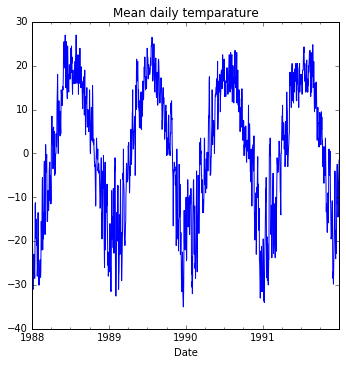

In [48]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

plt.savefig('B07887_02_03.png', format='png', dpi=300)

In [32]:
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

In [33]:
df.head(10)

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.00,01-1988
1988-01-02,1988-01-02,-20.50,01-1988
1988-01-03,1988-01-03,-22.00,01-1988
1988-01-04,1988-01-04,-30.50,01-1988
1988-01-05,1988-01-05,-31.00,01-1988
1988-01-06,1988-01-06,-27.50,01-1988
1988-01-07,1988-01-07,-26.25,01-1988
1988-01-08,1988-01-08,-26.50,01-1988
1988-01-09,1988-01-09,-23.00,01-1988


In [34]:
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median, np.std])

In [36]:
monthly_stats.head(10)

,mean,median,std
Month_Year,,,
01-1988,-22.137097,-23.00,5.260640
01-1989,-17.129032,-18.00,8.250725
01-1990,-15.112903,-12.00,6.606764
01-1991,-23.038710,-24.50,7.095570
02-1988,-19.025862,-19.50,8.598522
02-1989,-19.267857,-19.25,8.092042
02-1990,-17.482143,-16.50,8.018477
02-1991,-10.967857,-12.15,8.220753
03-1988,-8.258065,-9.25,5.341459


In [37]:
monthly_stats.reset_index(inplace=True)

In [38]:
monthly_stats.head(10)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [39]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))

In [40]:
monthly_stats.head(10)

,Month_Year,mean,median,std,Year
0,01-1988,-22.137097,-23.00,5.260640,1988
1,01-1989,-17.129032,-18.00,8.250725,1989
2,01-1990,-15.112903,-12.00,6.606764,1990
3,01-1991,-23.038710,-24.50,7.095570,1991
4,02-1988,-19.025862,-19.50,8.598522,1988
5,02-1989,-19.267857,-19.25,8.092042,1989
6,02-1990,-17.482143,-16.50,8.018477,1990
7,02-1991,-10.967857,-12.15,8.220753,1991
8,03-1988,-8.258065,-9.25,5.341459,1988
9,03-1989,-12.508065,-9.50,8.289925,1989


In [41]:
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))

In [42]:
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.00,5.260640,1988,01
1,01-1989,-17.129032,-18.00,8.250725,1989,01
2,01-1990,-15.112903,-12.00,6.606764,1990,01
3,01-1991,-23.038710,-24.50,7.095570,1991,01
4,02-1988,-19.025862,-19.50,8.598522,1988,02
5,02-1989,-19.267857,-19.25,8.092042,1989,02
6,02-1990,-17.482143,-16.50,8.018477,1990,02
7,02-1991,-10.967857,-12.15,8.220753,1991,02
8,03-1988,-8.258065,-9.25,5.341459,1988,03
9,03-1989,-12.508065,-9.50,8.289925,1989,03


In [43]:
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)

In [44]:
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


In [45]:
monthly_stats.index = monthly_stats['Month_Year']

In [46]:
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
Month_Year,,,,,,
01-1988,01-1988,-22.137097,-23.000,5.260640,1988,01
02-1988,02-1988,-19.025862,-19.500,8.598522,1988,02
03-1988,03-1988,-8.258065,-9.250,5.341459,1988,03
04-1988,04-1988,2.641667,1.875,5.057720,1988,04
05-1988,05-1988,11.290323,11.000,6.254364,1988,05
06-1988,06-1988,19.291667,19.000,3.909032,1988,06
07-1988,07-1988,19.048387,18.500,3.073692,1988,07
08-1988,08-1988,17.379032,18.000,3.183205,1988,08
09-1988,09-1988,10.675000,10.750,3.880294,1988,09


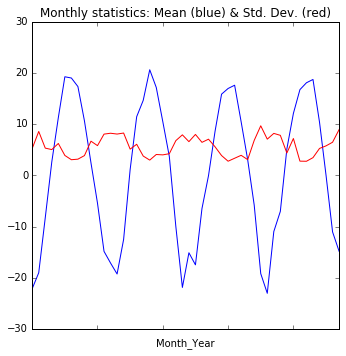

In [47]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

plt.savefig('B07887_02_04.png', format='png', dpi=300)

## Moving statistics

In [49]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [50]:
weekly_moving_average

Date
1988-01-01          NaN
1988-01-02          NaN
1988-01-03          NaN
1988-01-04          NaN
1988-01-05          NaN
1988-01-06          NaN
1988-01-07   -25.821429
1988-01-08   -26.321429
1988-01-09   -26.678571
1988-01-10   -26.892857
1988-01-11   -26.392857
1988-01-12   -25.750000
1988-01-13   -25.892857
1988-01-14   -25.607143
1988-01-15   -23.571429
1988-01-16   -21.892857
1988-01-17   -21.035714
1988-01-18   -19.750000
1988-01-19   -18.178571
1988-01-20   -16.892857
1988-01-21   -15.571429
1988-01-22   -16.821429
1988-01-23   -18.214286
1988-01-24   -18.571429
1988-01-25   -20.000000
1988-01-26   -21.571429
1988-01-27   -22.142857
1988-01-28   -22.750000
1988-01-29   -21.678571
1988-01-30   -21.392857
                ...    
1991-12-02   -18.085714
1991-12-03   -19.657143
1991-12-04   -21.842857
1991-12-05   -24.157143
1991-12-06   -25.900000
1991-12-07   -26.185714
1991-12-08   -24.900000
1991-12-09   -22.471429
1991-12-10   -19.757143
1991-12-11   -16.071429
1991-12-12 

In [51]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [52]:
monthly_moving_average

Date
1988-01-01          NaN
1988-01-02          NaN
1988-01-03          NaN
1988-01-04          NaN
1988-01-05          NaN
1988-01-06          NaN
1988-01-07          NaN
1988-01-08          NaN
1988-01-09          NaN
1988-01-10          NaN
1988-01-11          NaN
1988-01-12          NaN
1988-01-13          NaN
1988-01-14          NaN
1988-01-15          NaN
1988-01-16          NaN
1988-01-17          NaN
1988-01-18          NaN
1988-01-19          NaN
1988-01-20          NaN
1988-01-21          NaN
1988-01-22          NaN
1988-01-23          NaN
1988-01-24          NaN
1988-01-25          NaN
1988-01-26          NaN
1988-01-27          NaN
1988-01-28          NaN
1988-01-29          NaN
1988-01-30   -22.025000
                ...    
1991-12-02   -12.060000
1991-12-03   -12.476667
1991-12-04   -12.876667
1991-12-05   -13.176667
1991-12-06   -13.393333
1991-12-07   -13.633333
1991-12-08   -13.933333
1991-12-09   -13.983333
1991-12-10   -13.723333
1991-12-11   -13.523333
1991-12-12 

In [53]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

In [54]:
weekly_moving_average_2stride

Date
1988-01-01          NaN
1988-01-03          NaN
1988-01-05          NaN
1988-01-07   -25.821429
1988-01-09   -26.678571
1988-01-11   -26.392857
1988-01-13   -25.892857
1988-01-15   -23.571429
1988-01-17   -21.035714
1988-01-19   -18.178571
1988-01-21   -15.571429
1988-01-23   -18.214286
1988-01-25   -20.000000
1988-01-27   -22.142857
1988-01-29   -21.678571
1988-01-31   -22.178571
1988-02-02   -22.678571
1988-02-04   -24.928571
1988-02-06   -28.071429
1988-02-08   -27.107143
1988-02-10   -27.071429
1988-02-12   -25.607143
1988-02-14   -23.321429
1988-02-16   -21.714286
1988-02-18   -16.428571
1988-02-20   -15.178571
1988-02-22   -13.678571
1988-02-24   -14.428571
1988-02-26   -15.821429
1988-02-28   -11.392857
                ...    
1991-11-03    -9.900000
1991-11-05   -14.371429
1991-11-07   -15.085714
1991-11-09   -14.228571
1991-11-11   -13.300000
1991-11-13    -8.300000
1991-11-15    -6.042857
1991-11-17    -2.928571
1991-11-19    -1.928571
1991-11-21    -5.000000
1991-11-23 

In [55]:
monthly_moving_average_2stride

Date
1988-01-01          NaN
1988-01-03          NaN
1988-01-05          NaN
1988-01-07          NaN
1988-01-09          NaN
1988-01-11          NaN
1988-01-13          NaN
1988-01-15          NaN
1988-01-17          NaN
1988-01-19          NaN
1988-01-21          NaN
1988-01-23          NaN
1988-01-25          NaN
1988-01-27          NaN
1988-01-29          NaN
1988-01-31   -22.108333
1988-02-02   -22.625000
1988-02-04   -22.525000
1988-02-06   -22.550000
1988-02-08   -22.525000
1988-02-10   -22.716667
1988-02-12   -22.475000
1988-02-14   -22.425000
1988-02-16   -22.833333
1988-02-18   -22.325000
1988-02-20   -22.091667
1988-02-22   -21.725000
1988-02-24   -21.341667
1988-02-26   -20.383333
1988-02-28   -19.441667
                ...    
1991-11-03    -1.956667
1991-11-05    -3.350000
1991-11-07    -4.886667
1991-11-09    -5.980000
1991-11-11    -7.073333
1991-11-13    -7.173333
1991-11-15    -7.350000
1991-11-17    -7.366667
1991-11-19    -7.040000
1991-11-21    -7.640000
1991-11-23 

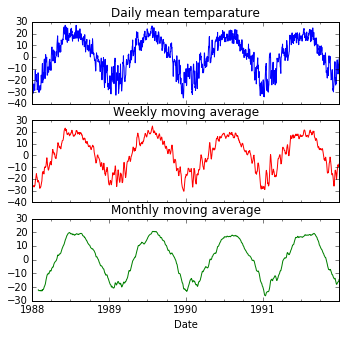

In [56]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

plt.savefig('B07887_02_05.png', format='png', dpi=300)

# Stationary processes
* Differencing
    - First-order differencing 
    - Second-order differencing
    - Seasonal differencing
* Augmented Dickey-Fuller test 

<img src="figures/cap06.png" width=600 />

## Differencing
* First-order differencing 
* Second-order differencing
* Seasonal differencing

## First-order differencing 

## Second-order differencing

## Seasonal differencing

## Augmented Dickey-Fuller test 

# Time series decomposition
* Moving averages
    - Moving averages and their smoothing effect 
    - Seasonal adjustment using moving average
    - Weighted moving average 

## Moving averages

### Moving averages and their smoothing effect 

### Seasonal adjustment using moving average

### Weighted moving average 

# Time series decomposition using moving averages 

# Time series decomposition using statsmodels.tsa 

# Summary

-----------------------

# 참고자료
* [1] book : Practical Time Series Analysis - https://www.packtpub.com/big-data-and-business-intelligence/practical-time-series-analysis
* [2] book github code - https://github.com/PacktPublishing/Practical-Time-Series-Analysis
* [3] git submodule 관련 - https://git-scm.com/book/ko/v1/Git-도구-서브모듈
* [4] seaborn으로 그래프 생성하다 에러 날 경우 - https://github.com/mwaskom/seaborn/issues/1103